# Overview of Model

The project will consist of data collection and analysis of high risk factors that contribute
to a student’s stress level in different aspects of their lives such as psychological, physical,
academic, and social factors. Through preprocessing, we aim to build a robust predictive model
that is capable of identifying students who may be at risk of high stress for the semester. With
this project, universities may be able to monitor and analyze student’s well-being and help them
through counseling, well-being programs, and academic help. The implementation of this project
will make use of Random Forest, SVM, and K-means clustering to effectively capture patterns
and relationships in the data relevant to the student’s stress levels.The model will be optimized
using a GridSearch hyperparameter tuning and evaluated using the appropriate performance
metrics

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Import Libraries Needed

In [ ]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix,roc_curve, auc
import seaborn as sns
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import RidgeCV, LassoCV, Ridge, Lasso#Loading the dataset
from sklearn.cluster import KMeans
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint, uniform


from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


# Data Collection and Processing

The dataset titled "Student Stress Factors: A Comprehensive Analysis" from Kaggle is designed to explore and analyze various factors related to student stress. The dataset contains several variables, each providing insights into different aspects of a student's mental well-being.

The following variables were used for this study:

1.   Anxiety (GAD-7)
2.   Self-esteem (Rosenberg Self Esteem Scale)
3.   Mental health history
4.   Depression (PHQ-9)
5.   Headache
6.   Blood pressure
7.   Sleep quality
8.   Breathing problem
9.   Noise level
10.  Living conditions
11.  Safety
12.  Basic Needs
13.  Academic performance
14.  Study load
15.  Teacher student relationship
16.  Future career concerns
17.  Social support
18.  Peer pressure
19.  Extracurricular activities
20.  Bullying

The data is collected from students ages between 15-24 in Dharan, Nepal.

The measurements used in this dataset is based on previous studies such as the GAD-7, Rosenberg Self Esteem Scale, Mental Health History, and the PHQ-9 scale. The remaining variables only range from 0 to 5 considering 0,1 to be low, 2,3 to be mid, and 4,5 to be high.







   anxiety_level  self_esteem  mental_health_history  depression  headache  \
0             14           20                      0          11         2   
1             15            8                      1          15         5   
2             12           18                      1          14         2   
3             16           12                      1          15         4   
4             16           28                      0           7         2   

   blood_pressure  sleep_quality  breathing_problem  noise_level  \
0               1              2                  4            2   
1               3              1                  4            3   
2               1              2                  2            2   
3               3              1                  3            4   
4               3              5                  1            3   

   living_conditions  ...  basic_needs  academic_performance  study_load  \
0                  3  ...            2        

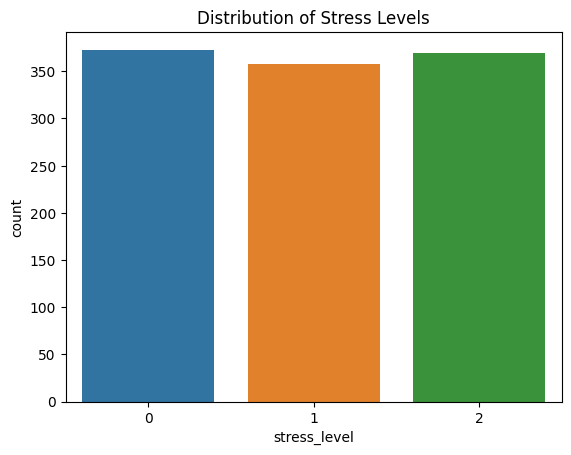

In [ ]:

dataset = pd.read_csv('/content/gdrive/MyDrive/StressLevelDataset.csv')
print(dataset.head())
# Select the features based on the given factors
psychological_factors = ['anxiety_level', 'self_esteem', 'mental_health_history', 'depression']
physiological_factors = ['headache', 'blood_pressure', 'sleep_quality', 'breathing_problem']
environmental_factors = ['noise_level', 'living_conditions', 'safety', 'basic_needs']
academic_factors = ['academic_performance', 'study_load', 'teacher_student_relationship', 'future_career_concerns']
social_factor = ['social_support', 'peer_pressure', 'extracurricular_activities', 'bullying']

selected_features = psychological_factors + physiological_factors + environmental_factors + academic_factors + social_factor

X = dataset[selected_features]
y = dataset['stress_level']

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit and transform the data
X_normalized = scaler.fit_transform(X)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_normalized, y, test_size=0.2, random_state=42)

# Apply PCA for dimensionality reduction
pca = PCA(n_components=10)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

# Visualize the distribution of target classes
sns.countplot(x='stress_level', data=dataset)
plt.title('Distribution of Stress Levels')
plt.show()


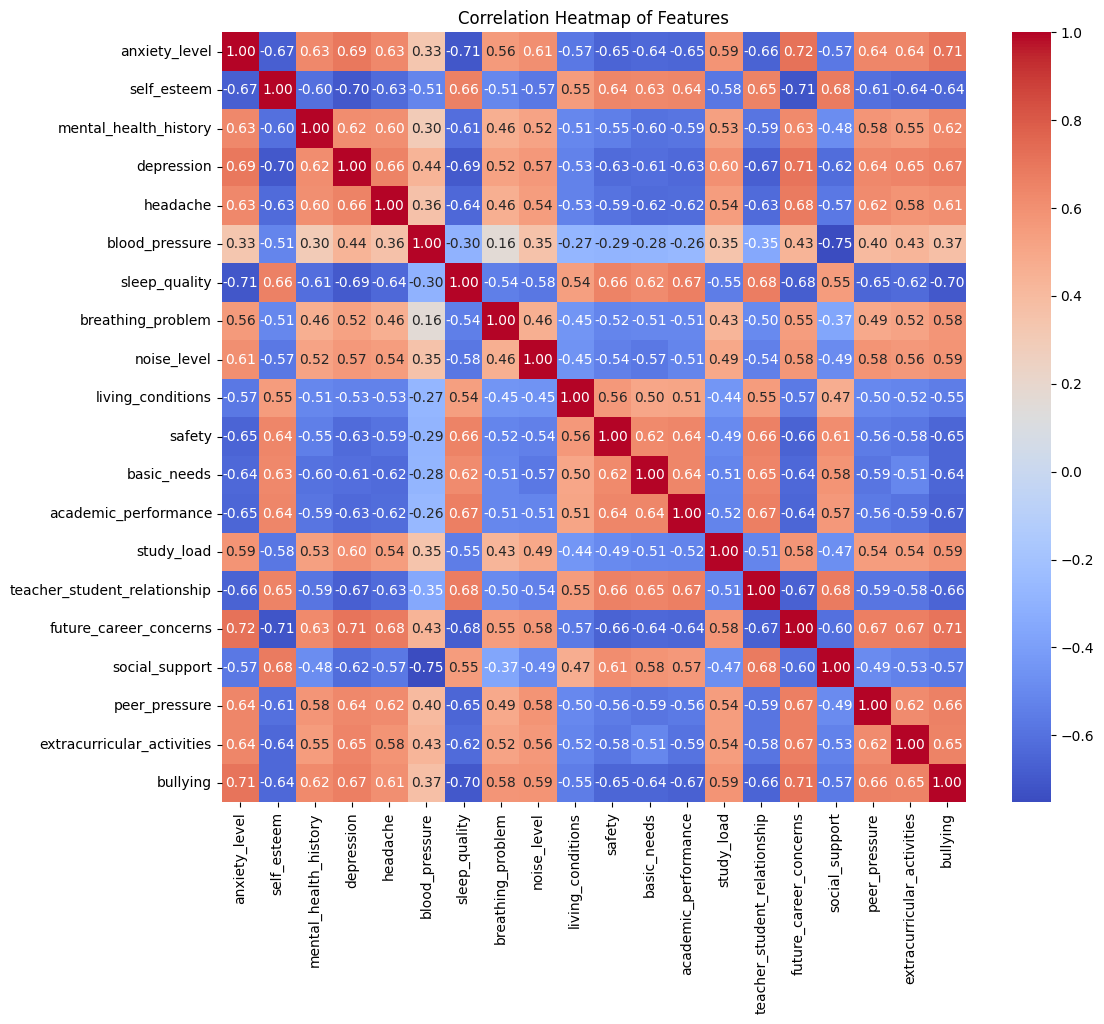

In [ ]:
#Correlation Heatmap of Features
plt.figure(figsize=(12, 10))
sns.heatmap(X.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Features')
plt.show()

To better understand the relationships between the different features in the dataset, we look at the correlational heatmap.

# Random Forest (RF)

In [ ]:
# Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
rf_predictions = rf_model.predict(X_test)

# Random Forest with PCA
rf_model_pca = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model_pca.fit(X_train_pca, y_train)
rf_predictions_pca = rf_model_pca.predict(X_test_pca)



In [ ]:
# Random Forest Hyperparameter Optimization
rf_params = {
    'n_estimators': randint(10, 200),
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth': randint(1, 20),
    'min_samples_split': randint(2, 20),
    'min_samples_leaf': randint(1, 20),
    'bootstrap': [True, False]
}

rf_model_rand = RandomForestClassifier(random_state=42)
rf_random = RandomizedSearchCV(rf_model_rand, param_distributions=rf_params, n_iter=100, cv=5, random_state=42, n_jobs=-1, scoring='accuracy')
rf_random.fit(X_train, y_train)

# Get the best parameters
best_rf_params = rf_random.best_params_
print("Best Random Forest Parameters:", best_rf_params)

# Train Random Forest with best parameters
best_rf_model = RandomForestClassifier(**best_rf_params, random_state=42)
best_rf_model.fit(X_train, y_train)
best_rf_predictions = best_rf_model.predict(X_test)
rf_accuracy = accuracy_score(y_test, best_rf_predictions)

Best Random Forest Parameters: {'bootstrap': True, 'max_depth': 1, 'max_features': 'auto', 'min_samples_leaf': 13, 'min_samples_split': 10, 'n_estimators': 12}


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


In [ ]:
# Evaluate models without PCA
print("Random Forest without PCA Metrics:")
print("Accuracy:", accuracy_score(y_test, rf_predictions))
print("Classification Report:\n", classification_report(y_test, rf_predictions))
rf_cm1 = confusion_matrix(y_test, rf_predictions)
print("Confusion Matrix:\n", rf_cm1)

# Evaluate models with PCA
print("Random Forest with PCA Metrics:")
print("Accuracy:", accuracy_score(y_test, rf_predictions_pca))
print("Classification Report:\n", classification_report(y_test, rf_predictions_pca))
rf_cm2 = confusion_matrix(y_test, rf_predictions_pca)
print("Confusion Matrix:\n", rf_cm2)

# Evaluate models with HPO
print("Random Forest with HPO Metrics:")
print("Accuracy:", accuracy_score(y_test, best_rf_predictions))
print("Classification Report:\n", classification_report(y_test, best_rf_predictions))
best_rf_cm = confusion_matrix(y_test, best_rf_predictions)
print("Confusion Matrix:\n", best_rf_cm)

Random Forest without PCA Metrics:
Accuracy: 0.8681818181818182
Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.88      0.86        76
           1       0.89      0.86      0.88        73
           2       0.88      0.86      0.87        71

    accuracy                           0.87       220
   macro avg       0.87      0.87      0.87       220
weighted avg       0.87      0.87      0.87       220

Confusion Matrix:
 [[67  5  4]
 [ 6 63  4]
 [ 7  3 61]]
Random Forest with PCA Metrics:
Accuracy: 0.8727272727272727
Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.87      0.86        76
           1       0.93      0.89      0.91        73
           2       0.85      0.86      0.85        71

    accuracy                           0.87       220
   macro avg       0.87      0.87      0.87       220
weighted avg       0.87      0.87      0.87       220

Confusion

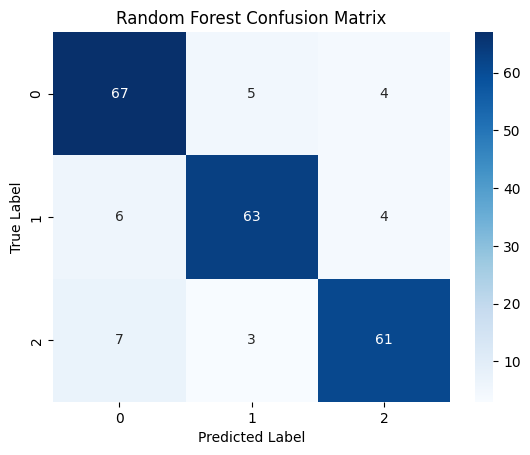

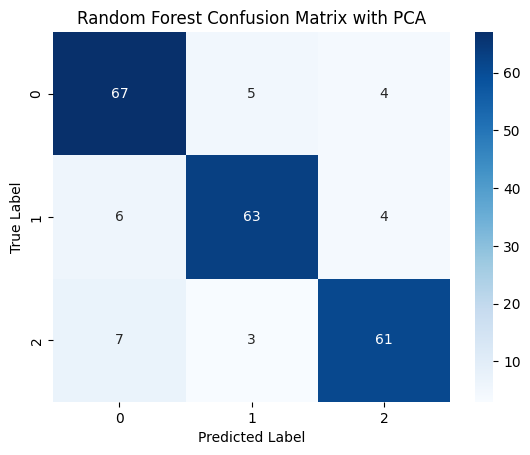

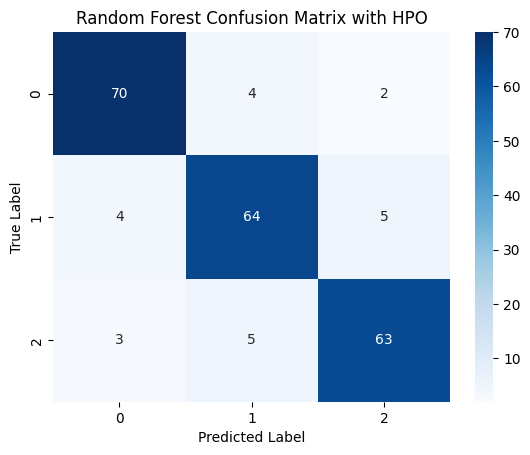

In [ ]:
# Confusion Matrix for Random Forest without PCA
rf_cm = confusion_matrix(y_test, rf_predictions)
sns.heatmap(rf_cm, annot=True, fmt='d', cmap='Blues', xticklabels=sorted(y.unique()), yticklabels=sorted(y.unique()))
plt.title('Random Forest Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# Confusion Matrix for Random Forest with PCA
rf_cm2 = confusion_matrix(y_test, rf_predictions)
sns.heatmap(rf_cm2, annot=True, fmt='d', cmap='Blues', xticklabels=sorted(y.unique()), yticklabels=sorted(y.unique()))
plt.title('Random Forest Confusion Matrix with PCA')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# Confusion Matrix for Random Forest with HPO
best_rf_cm = confusion_matrix(y_test, best_rf_predictions)
sns.heatmap(best_rf_cm, annot=True, fmt='d', cmap='Blues', xticklabels=sorted(y.unique()), yticklabels=sorted(y.unique()))
plt.title('Random Forest Confusion Matrix with HPO')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()



**Performance Analysis**

Looking at solely at the accuracy of the Random Forest Classification (RFC) with its three versions, we can see that the RFC with HPO performed significantly better than RFC alone and with PCA, and by studying the three classification reports and the confusion matrices, we get a more in-depth understanding of their slightly difference.

In terms of the classification report of RFC alone and with PCA, we can see that although the performance of the RFC alone compared to RFC with PCA, returned equal or higher f1-scores in classifying stress level 0 and 2, the difference of the f1-scores in terms of classifying stress level 1. Looking closely, we can see that the precision of RFC with PCA is greater than RFC alone in classifying stress levels 0 and 1 while sacrificing its recall, which resulted in the overall better performance of the RFC with PCA.

Comparing the performance of RFC with PCA to with HPO, we can see a greater difference in terms of both precision and recall than with RFC alone and with PCA. Scoring a higher f1-score in all three classifiers, allowed RFC with HPO to outperform both other versions of RFC.

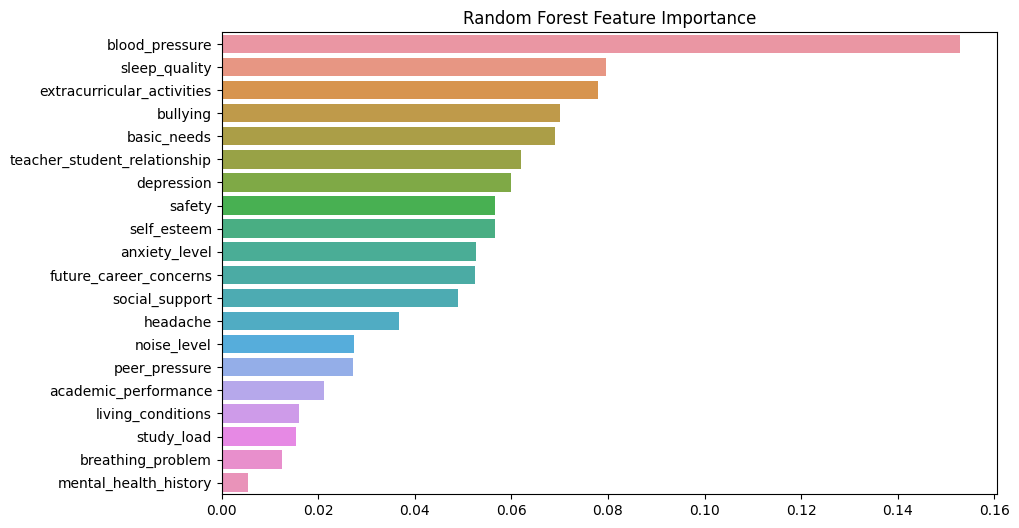

In [ ]:
# Feature Importance for Random Forest
feature_importance = pd.Series(rf_model.feature_importances_, index=selected_features).sort_values(ascending=False)
plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importance, y=feature_importance.index)
plt.title('Random Forest Feature Importance')
plt.show()

Looking at this graph, we can see that the most significant classifier/feature of the data for the RFC is the blood pressure, followed by sleep quality and extracurricular activities.

This can be interpreted as overall health of the student in addition to doing activities outside their priority are the main contributors of a student’s stress level.

# Support Vector Machines (SVM)

In [ ]:
# Support Vector Machines
svm_model = SVC(kernel='linear', C=1)
svm_model.fit(X_train, y_train)
svm_predictions = svm_model.predict(X_test)

# Support Vector Machines with PCA
svm_model_pca = SVC(kernel='linear', C=1)
svm_model_pca.fit(X_train_pca, y_train)
svm_predictions_pca = svm_model_pca.predict(X_test_pca)

#Accuracy

# Support Vector Machine Hyperparameter Optimization
svm_params = {
    'C': uniform(0.1, 10),
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
    'degree': randint(1, 5),
    'gamma': ['scale', 'auto', 'scale']
}

svm_model_rand = SVC(random_state=42)
svm_random = RandomizedSearchCV(svm_model_rand, param_distributions=svm_params, n_iter=100, cv=5, random_state=42, n_jobs=-1, scoring='accuracy')
svm_random.fit(X_train, y_train)

# Get the best parameters
best_svm_params = svm_random.best_params_
# Train Support Vector Machine with best parameters
best_svm_model = SVC(**best_svm_params, random_state=42)
best_svm_model.fit(X_train, y_train)
best_svm_predictions = best_svm_model.predict(X_test)

svm_accuracy = accuracy_score(y_test,best_svm_predictions)

In [ ]:
# Evaluate SVM without PCA
print("\nSupport Vector Machines without PCA Metrics:")
print("Accuracy:", accuracy_score(y_test, svm_predictions))
print("Classification Report:\n", classification_report(y_test, svm_predictions))
svm_cm = confusion_matrix(y_test, svm_predictions)
print("Confusion Matrix:\n", svm_cm)

# Evaluate SVM with PCA
print("\nSupport Vector Machines with PCA Metrics:")
print("Accuracy:", accuracy_score(y_test, svm_predictions_pca))
print("Classification Report:\n", classification_report(y_test, svm_predictions_pca))
svm_cm = confusion_matrix(y_test, svm_predictions_pca)
print("Confusion Matrix:\n", svm_cm)

# Evaluate SVM with HPO
print("\nSupport Vector Machines with HPO Metrics:")
print("Accuracy:", accuracy_score(y_test, best_svm_predictions))
print("Classification Report:\n", classification_report(y_test, best_svm_predictions))
best_svm_cm = confusion_matrix(y_test, best_svm_predictions)
print("Confusion Matrix:\n", best_svm_cm)


Support Vector Machines without PCA Metrics:
Accuracy: 0.8909090909090909
Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.88      0.88        76
           1       0.88      0.90      0.89        73
           2       0.91      0.89      0.90        71

    accuracy                           0.89       220
   macro avg       0.89      0.89      0.89       220
weighted avg       0.89      0.89      0.89       220

Confusion Matrix:
 [[67  5  4]
 [ 5 66  2]
 [ 4  4 63]]

Support Vector Machines with PCA Metrics:
Accuracy: 0.8772727272727273
Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.87      0.86        76
           1       0.94      0.88      0.91        73
           2       0.84      0.89      0.86        71

    accuracy                           0.88       220
   macro avg       0.88      0.88      0.88       220
weighted avg       0.88      0.88      0.8

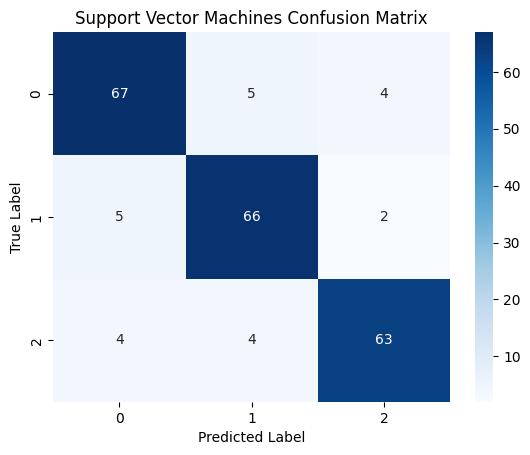

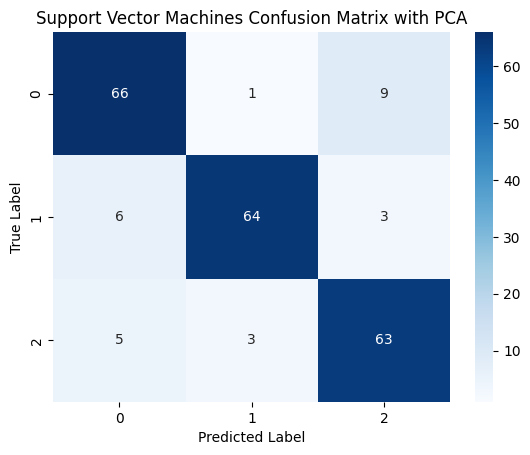

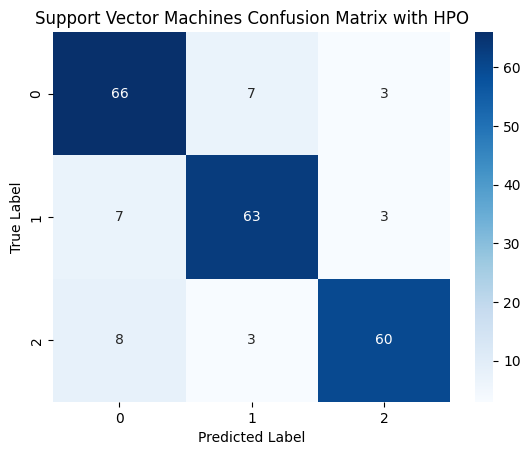

In [ ]:
# Confusion Matrix for Support Vector Machines without PCA
svm_cm = confusion_matrix(y_test, svm_predictions)
sns.heatmap(svm_cm, annot=True, fmt='d', cmap='Blues', xticklabels=sorted(y.unique()), yticklabels=sorted(y.unique()))
plt.title('Support Vector Machines Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# Confusion Matrix for Support Vector Machines with PCA
svm_cm = confusion_matrix(y_test, svm_predictions_pca)
sns.heatmap(svm_cm, annot=True, fmt='d', cmap='Blues', xticklabels=sorted(y.unique()), yticklabels=sorted(y.unique()))
plt.title('Support Vector Machines Confusion Matrix with PCA')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# Confusion Matrix for Support Vector Machines with HPO
best_svm_cm = confusion_matrix(y_test, best_svm_predictions)
sns.heatmap(best_svm_cm, annot=True, fmt='d', cmap='Blues', xticklabels=sorted(y.unique()), yticklabels=sorted(y.unique()))
plt.title('Support Vector Machines Confusion Matrix with HPO')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

**Performance Analysis**

Looking solely at the accuracy score of the performance of SVM, with PCA, and with HPO, we can see that the SVM alone performed marginally better than with PCA and with HPO.


Studying the classification report of the three classifiers, we can see that the f1-scores of the SVM alone performed significantly better than with PCA in classifying stress levels 0 and 2, it supplemented the difference of the classifiers in terms of stress level 1. In terms of SVM compared to with HPO, we can clearly see that it performed better across all three classifications. And by looking at the confusion matrices, the same pattern can be observed.


<Axes: >

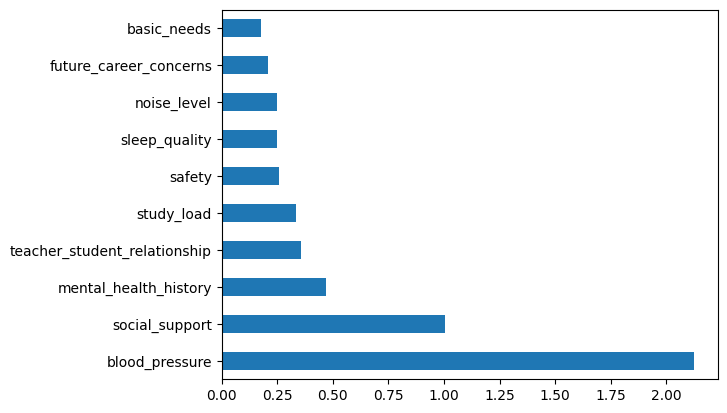

In [ ]:
# Feature Importance for Random Forest
feature_importance = pd.Series(abs(svm_model.coef_[0]), index=selected_features).nlargest(10).plot(kind='barh')
feature_importance

And by looking at the graph above, we can see that the most important feature in classifying the stress levels using SVM is the blood pressure, followed by social support and mental health history.

Similarly to Random Forest Classification, with blood pressure is a feature that is affected by other physiological factors which dictates that for SVM, self-care as well as environmental support are the key factors in classifying stress levels.

# K-Nearest Neighbors (KNN)

In [ ]:
# K-Nearest Neighbors
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train, y_train)
knn_predictions = knn_model.predict(X_test)

# K-Nearest Neighbors with PCA
knn_model_pca = KNeighborsClassifier(n_neighbors=5)
knn_model_pca.fit(X_train_pca, y_train)
knn_predictions_pca = knn_model_pca.predict(X_test_pca)

# K-Nearest Neighbors Hyperparameter Optimization
knn_params = {
    'n_neighbors': randint(1, 30),
    'weights': ['uniform', 'distance'],
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
    'leaf_size': randint(1, 50),
    'p': [1, 2]
}

knn_model_rand = KNeighborsClassifier()
knn_random = RandomizedSearchCV(knn_model_rand, param_distributions=knn_params, n_iter=100, cv=5, random_state=42, n_jobs=-1, scoring='accuracy')
knn_random.fit(X_train, y_train)

best_knn_params = knn_random.best_params_

# Train K-Nearest Neighbors with best parameters
best_knn_model = KNeighborsClassifier(**best_knn_params)
best_knn_model.fit(X_train, y_train)
best_knn_predictions = best_knn_model.predict(X_test)

knn_accuracy = accuracy_score(y_test,best_knn_predictions)

In [ ]:
# Evaluate KNN without PCA

print("\nK-Nearest Neighbors:")
print("Accuracy:", accuracy_score(y_test, knn_predictions))
print("Classification Report:\n", classification_report(y_test, knn_predictions))
knn_cm = confusion_matrix(y_test, knn_predictions)
print("Confusion Matrix:\n", knn_cm)

# Evaluate KNN with PCA
print("\nK-Nearest Neighbors with PCA Metrics:")
print("Accuracy:", accuracy_score(y_test, knn_predictions_pca))
print("Classification Report:\n", classification_report(y_test, knn_predictions_pca))
knn_cm = confusion_matrix(y_test, knn_predictions_pca)
print("Confusion Matrix:\n", knn_cm)

# Evaluate KNN with HPO
print("\nK-Nearest Neighbors with HPO Metrics:")
print("Accuracy:", accuracy_score(y_test, best_knn_predictions))
print("Classification Report:\n", classification_report(y_test, best_knn_predictions))
best_knn_cm = confusion_matrix(y_test, best_knn_predictions)
print("Confusion Matrix:\n", best_knn_cm)


K-Nearest Neighbors:
Accuracy: 0.8681818181818182
Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.86      0.86        76
           1       0.86      0.89      0.87        73
           2       0.90      0.86      0.88        71

    accuracy                           0.87       220
   macro avg       0.87      0.87      0.87       220
weighted avg       0.87      0.87      0.87       220

Confusion Matrix:
 [[65  7  4]
 [ 5 65  3]
 [ 6  4 61]]

K-Nearest Neighbors with PCA Metrics:
Accuracy: 0.8590909090909091
Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.87      0.85        76
           1       0.89      0.85      0.87        73
           2       0.87      0.86      0.87        71

    accuracy                           0.86       220
   macro avg       0.86      0.86      0.86       220
weighted avg       0.86      0.86      0.86       220

Confusion Matri

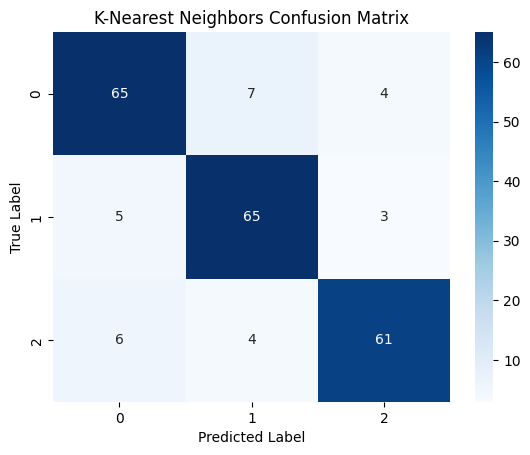

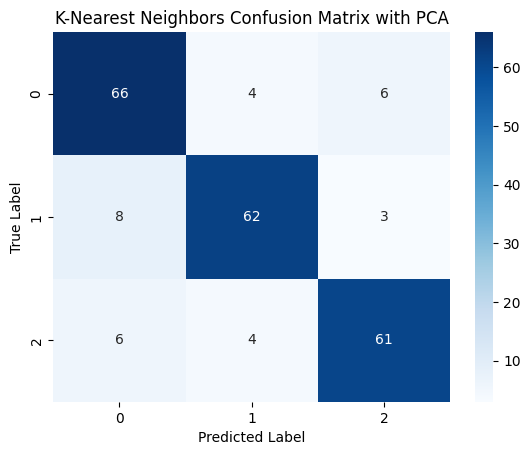

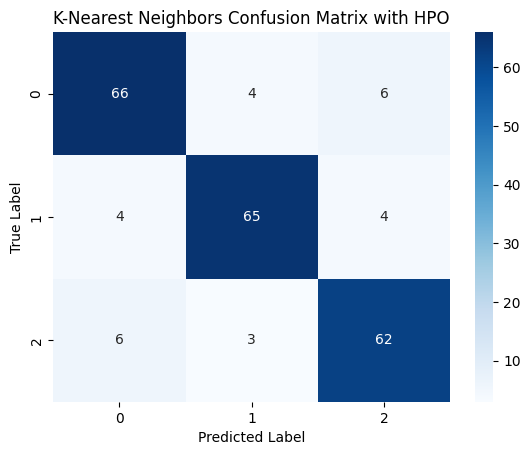

In [ ]:
# Confusion Matrix for K-Nearest Neighbors
knn_cm = confusion_matrix(y_test, knn_predictions)
sns.heatmap(knn_cm, annot=True, fmt='d', cmap='Blues', xticklabels=sorted(y.unique()), yticklabels=sorted(y.unique()))
plt.title('K-Nearest Neighbors Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# Confusion Matrix for K-Nearest Neighbors with PCA
knn_cm = confusion_matrix(y_test, knn_predictions_pca)
sns.heatmap(knn_cm, annot=True, fmt='d', cmap='Blues', xticklabels=sorted(y.unique()), yticklabels=sorted(y.unique()))
plt.title('K-Nearest Neighbors Confusion Matrix with PCA')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# Confusion Matrix for K-Nearest Neighbors with HPO
best_knn_cm = confusion_matrix(y_test, best_knn_predictions)
sns.heatmap(best_knn_cm, annot=True, fmt='d', cmap='Blues', xticklabels=sorted(y.unique()), yticklabels=sorted(y.unique()))
plt.title('K-Nearest Neighbors Confusion Matrix with HPO')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

**Performance Analysis**

Comparing the raw accuracy of K-Nearest Neighbors (KNN) with and without PCA, we can see that KNN without PCA performed slightly better than KNN with PCA, similarly to how RFC with PCA performed better than RFC without PCA, and we can look at the classification reports and confusion matrices to see just where they differed.

Although the behavior of the KNN with and without PCA performed similarly to RFC with and without PCA, albeit in opposite directions, unlike RFC, KNN without PCA performed similarly in terms of stress level 1 and better in stress level 0 and 2 compared to KNN with PCA. This can be seen in the precision and recall scores of both classifiers in stress level 0 and 2.

However, the opposite can be seen in terms of the confusion matrices. In the classification report, KNN without PCA ‘reportedly’ performed better in classifying stress level 0 and 2, but their confusion matrices dictate something else. In terms of the confusion matrices, KNN without PCA performed slightly worse in classifying stress level 0 and marginally better in stress level 1, which is contradictory to the classification report.

This indicates that although the better quality and reliability of KNN without PCA is said to be from classifying stress levels 0 and 2, the confusion matrices point out that it performed significantly better in  terms of classifying stress level 1.

After the importance of using different accuracy metrics, we move over to comparing the performance of KNN alone to KNN with HPO. And we can see that although the classification report shows that KNN with HPO showed its strength when classifying stress levels 0 and 1, it performed lower in stress level 2. Then comparing it to the confusion matrix, we can once again see the discrepancy on where each version showcases its strength.

In the confusion matrix, it can be seen that KNN with HPO performed better for stress level 0 and 2, while having the same performance as KNN alon for stress level 1. Hence, we can gather that the overall performance of the KNN with HPO performs better in all classifier compared to KNN alone and with PCA.



# Comparison of Performance

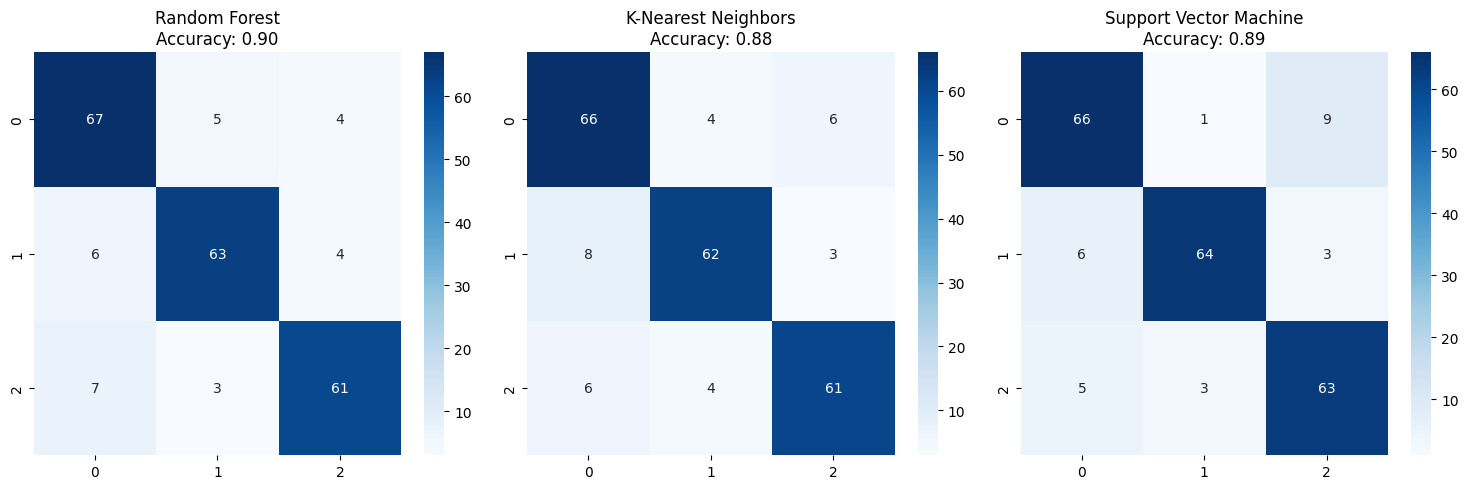

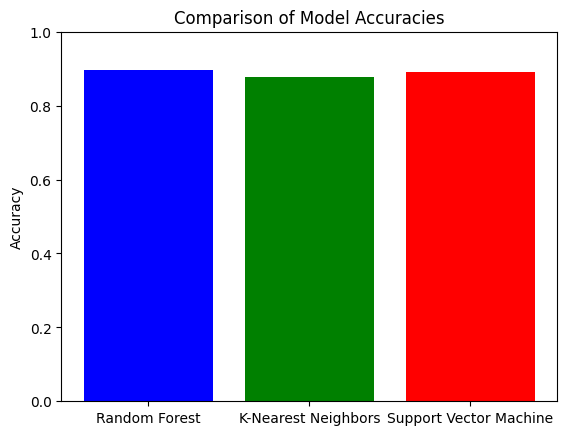

In [ ]:
# Visualize Confusion Matrices
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Random Forest
sns.heatmap(rf_cm, annot=True, fmt='d', cmap='Blues', xticklabels=sorted(y.unique()), yticklabels=sorted(y.unique()), ax=axes[0])
axes[0].set_title(f'Random Forest\nAccuracy: {rf_accuracy:.2f}')

# K-Nearest Neighbors
sns.heatmap(knn_cm, annot=True, fmt='d', cmap='Blues', xticklabels=sorted(y.unique()), yticklabels=sorted(y.unique()), ax=axes[1])
axes[1].set_title(f'K-Nearest Neighbors\nAccuracy: {knn_accuracy:.2f}')

# Support Vector Machine
sns.heatmap(svm_cm, annot=True, fmt='d', cmap='Blues', xticklabels=sorted(y.unique()), yticklabels=sorted(y.unique()), ax=axes[2])
axes[2].set_title(f'Support Vector Machine\nAccuracy: {svm_accuracy:.2f}')

plt.tight_layout()
plt.show()

# Bar chart
models = ['Random Forest', 'K-Nearest Neighbors', 'Support Vector Machine']
accuracies = [rf_accuracy, knn_accuracy, svm_accuracy]

plt.bar(models, accuracies, color=['blue', 'green', 'red'])
plt.ylim([0, 1])  # Set y-axis limit to the range of accuracy scores
plt.ylabel('Accuracy')
plt.title('Comparison of Model Accuracies')
plt.show()

Looking at accuracy of the different models, we can see that RF with HPO has the highest overall accuracy (90%), followed closely by the SVM(89%), and KNN(86%). Since the SVM is the best performing model in terms of the accuracy, we will be using this in the early intervention system sample.

# Early Intervention System

This early intervention system is designed to identify students who are at risk of experiencing low to high levels of stress based on predictions made from the SVM classifier. The system takes an approach to address potential stress factors in students and triggers appropriate actions based on the predicted stress levels.


In [ ]:
# Make predictions on the test set
# Use the original features or the reduced features (X_test or X_test_pca)

#Example if new data entry is given
new_data = np.array([19, 20, 0, 11, 2, 1, 2, 4, 2, 3, 3, 2, 3, 2, 3, 3, 2, 3, 3, 2])

#predictions = svm_model.decision_function(new_data.reshape(1, -1))
#print(X_test)
#predictions = rf_model.predict_proba(X_test)
predictions = rf_model.predict_proba(new_data.reshape(1, -1))

# Implement an early intervention system
threshold_high = 0.7
threshold_medium = 0.4
threshold_low = 0.1

# Identify high-risk and medium-risk students
low_risk_indices = [i for i, prob in enumerate(predictions[:, 0] > threshold_low) if prob]
high_risk_indices = [i for i, prob in enumerate(predictions[:, 2] > threshold_high) if prob]
medium_risk_indices = [i for i, prob in enumerate((predictions[:, 1] > threshold_medium) & (predictions[:, 2] <= threshold_high)) if prob]

# Early intervention actions
def send_notification(student_name,message):
    print(f"\n---Sending notification---: {message}...")

def recommend_counseling(student_name):
    print(f"\nRecommend counseling for {student_name} to address stress.")

def notify_guardians(student_name, stress_level):
    tips_message = "Provide tips on handling stress for children."
    print(f"\nNotifying legal guardians of {student_name} about {stress_level} stress. {tips_message}")

# Process high-risk students
for index in high_risk_indices:
    student = dataset.iloc[y_test.index[index]]
    student_name = "'Student-High-Stress'"

    # Send notifications based on stress level
    send_notification(student_name,"\nUrgent: High stress level detected.")

    # Recommend counseling for high-stress students
    recommend_counseling(student_name)

    # Notify legal guardians with tips on handling stress for children
    notify_guardians(student_name, "High")

# Process medium-risk students
for index in medium_risk_indices:
    student = dataset.iloc[y_test.index[index]]
    student_name = "'Student-Medium-Stress'"

    # Send notifications based on stress level
    send_notification(student_name, "Moderate stress level detected.")

    # Recommend counseling for medium-stress students
    recommend_counseling(student_name)

    # Notify legal guardians with tips on handling stress for children
    notify_guardians(student_name, "Medium")

# Process low-risk students
for index in low_risk_indices:
    student = dataset.iloc[y_test.index[index]]
    student_name = "'Student-Low-Stress'"

    # Send notifications based on stress level
    send_notification(student_name, "Low stress level detected.")



---Sending notification---: Low stress level detected....


Here, we have demonstrated a sample of an early intervention system for student stress levels. In this sample, we have identified levels of stress based on the entered data. In this case, we used the test split portion of the data used.

After identifying the level of stress of the students, appropriate actions are taken. It is notable that this early intervention system is only a sample made by our group as a demonstration for the application of our findings in the student stress predictio model using SVM.

This early intervention system is best to improved and use more actions based on expert advice.